In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree # To run decision tree model
from sklearn import tree
from sklearn.metrics import accuracy_score


In [7]:
dataset = pd.read_csv("https://gist.githubusercontent.com/kudaliar032/b8cf65d84b73903257ed603f6c1a2508/raw/aa4826eb745d09a2df4967a793410e141642cbed/golf-dataset.csv")
dataset.head()

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


In [8]:
from sklearn import preprocessing

def label_enc(features,dataset):
  label_encoder = preprocessing.LabelEncoder()
  for i in features:
    dataset[i]=label_encoder.fit_transform(dataset[i])
features = list(dataset.columns)
label_enc(features,dataset)
dataset['Outlook'].unique()

array([1, 0, 2])

In [9]:
dataset.head()

,Outlook,Temp,Humidity,Windy,Play Golf
0,1,1,0,0,0
1,1,1,0,1,0
2,0,1,0,0,1
3,2,2,0,0,1
4,2,0,1,0,1


In [10]:
X = dataset.drop(columns=['Play Golf'])
Y = dataset['Play Golf']
print(X)
print(Y)

    Outlook  Temp  Humidity  Windy
0         1     1         0      0
1         1     1         0      1
2         0     1         0      0
3         2     2         0      0
4         2     0         1      0
5         2     0         1      1
6         0     0         1      1
7         1     2         0      0
8         1     0         1      0
9         2     2         1      0
10        1     2         1      1
11        0     2         0      1
12        0     1         1      0
13        2     2         0      1
0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play Golf, dtype: int32


In [11]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
   

In [12]:
dt = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=5)
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy*100)
     

Accuracy: 33.33333333333333


In [13]:
text_representation = tree.export_text(dt)
print(text_representation)


|--- feature_0 <= 0.50
|   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_3 >  0.50
|   |   |   |--- class: 0



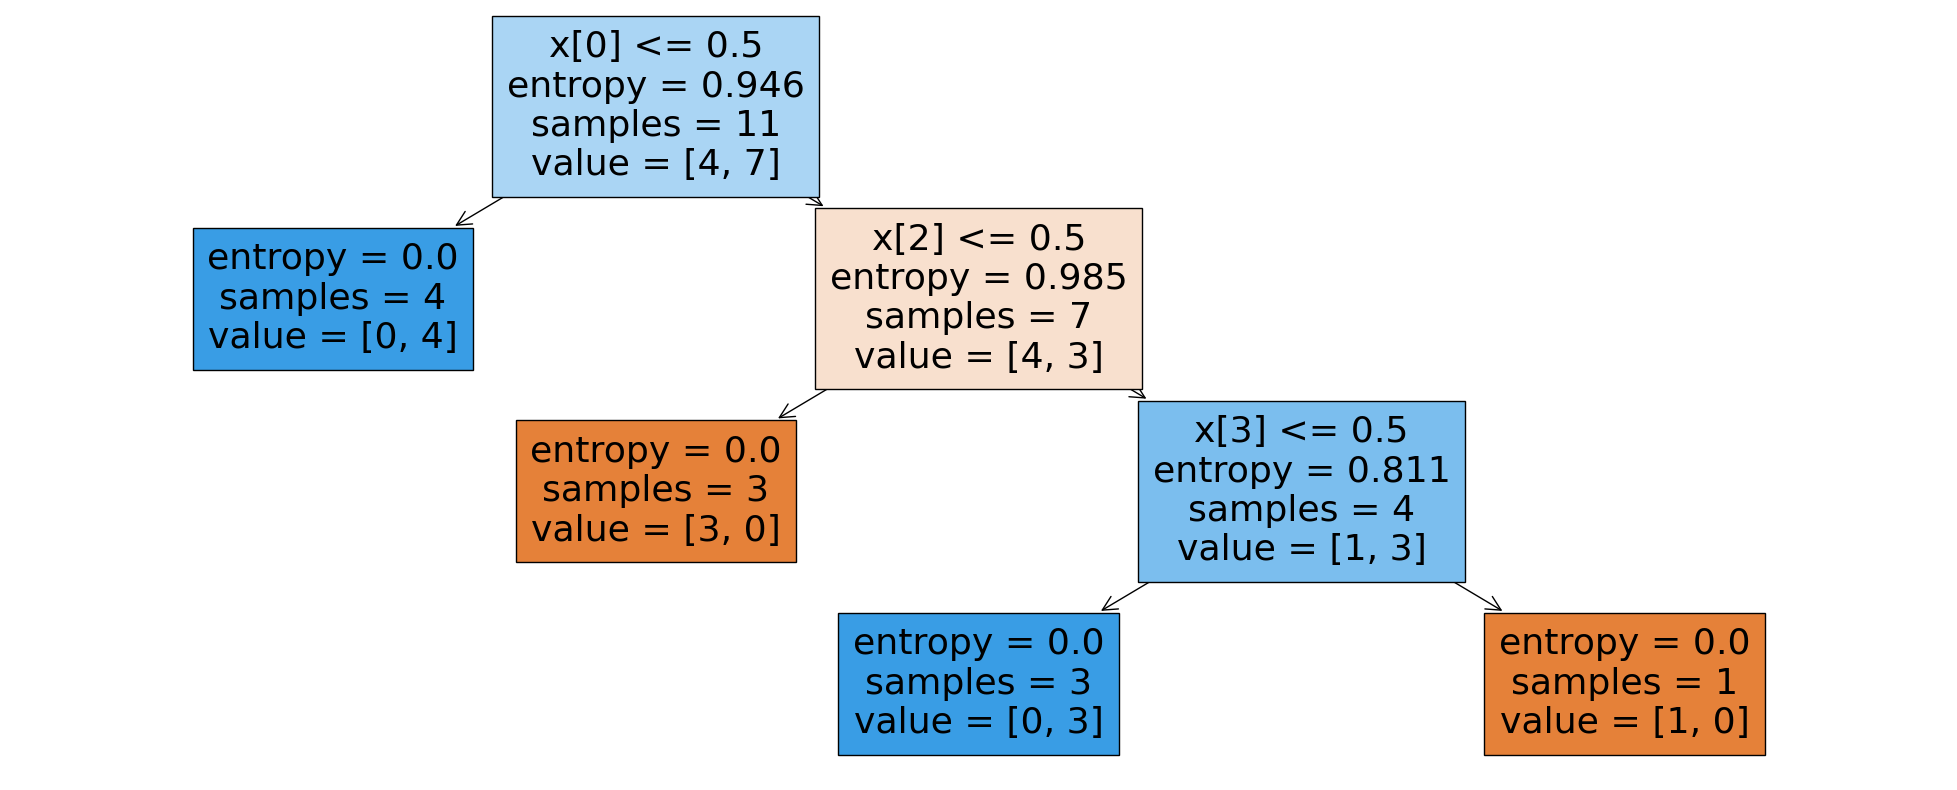

In [14]:
fig, ax = plt.subplots(figsize=(25, 10))
plot_tree(dt, filled=True, ax=ax)
plt.show()
     